This notebook is a simple example of loading the dataset, generating a random test and train split, and evaluating the model performance. This is done as a simple test, showing that with a Random Forest we perform accurately on the dataset (~85-90% balanced accuracy).

In [469]:
import numpy as np
import pandas as pd

In [470]:
# We get the data from file
df = pd.read_csv('compiled_datasets/nanotox_features_dataset.csv')
X = df.values[:, 1:-1]
y = df.values[:, -1].astype(int)

In [471]:
# We split the data into a training set and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.5)

In [472]:
# We train a random forest model with default parameters on the training set
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced')


rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [473]:
# We get the predicted labels and probabilities
y_hat = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

In [474]:
# We calculate a class-balanced accuracy and confusion matrix to test the accuracy of our predicted labels
from sklearn.metrics import balanced_accuracy_score, confusion_matrix

print('Balanced Accuracy:', balanced_accuracy_score(y_test, y_hat))
confusion_matrix(y_test, y_hat)

Balanced Accuracy: 0.7828567321643565


array([[2051,  183],
       [ 327,  601]])

ROC AUC: 0.8833491224956009


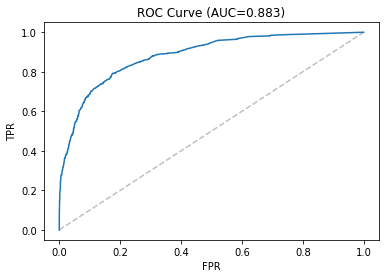

In [475]:
# We generate a receiver operating characteristic curve to test the accuracy of our predicted probabilities
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

print('ROC AUC:', roc_auc_score(y_test, y_prob))
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot((0, 1), (0, 1), alpha=0.5, color='gray', linestyle='dashed')
plt.plot(fpr, tpr)
plt.xlabel('FPR'), plt.ylabel('TPR')
plt.title(f'ROC Curve (AUC={round(roc_auc_score(y_test, y_prob), 3)})')
plt.show()